In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("crowd_train/raw_crowd_train.jsonl", "r") as file:
    lines = file.read().splitlines()

In [3]:
dicts = [eval(x.replace('NaN', 'np.nan')) for x in lines]

In [17]:
df = pd.DataFrame.from_records(dicts)

In [18]:
df.shape

(906953, 9)

In [48]:
df_not_dupl = df.drop_duplicates(subset="speaker_text")
df_not_dupl.shape

(124569, 9)

In [49]:
df_not_dupl.to_parquet('crowd_train_without_duplicates.pqt')

In [28]:
res = df_not_dupl.source_id.value_counts()

<Axes: xlabel='source_id', ylabel='count'>

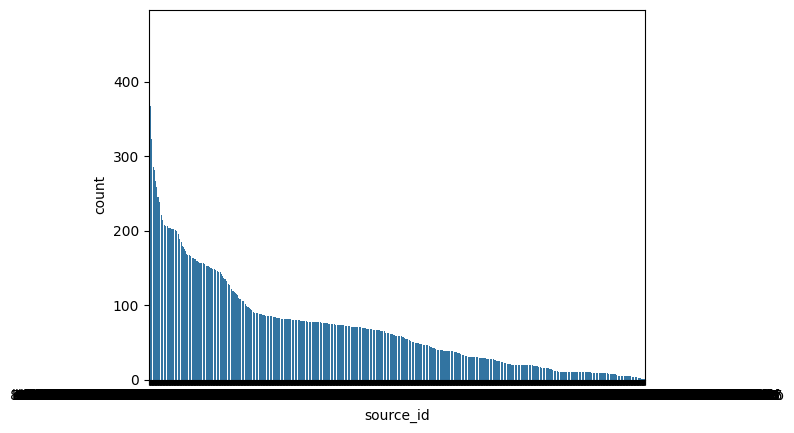

In [21]:
sns.barplot(res)

In [29]:
res = res[res >= 5]

In [31]:
res

source_id
749bd4cad1ddbc7211b23a68e5f9f12a    473
8fdd37d08a1edd4c3f05f3df1e1d4a8d    462
8d912022a064613108789cd33ec6d776    413
ddea0499db65074f0de8570a460b6bc6    386
b603926497b0f7d1ce220b682622a429    380
                                   ... 
99fd9d1f1a5cf1765773d835f019ff5a      5
34eeb75bea7a0ee06a5f3b0db10380a7      5
05eb3646a87cac79d8ed0b47d3e7a548      5
4de41c378904edef713b2daecd0d5ad8      5
9fbdd956c928edba3ae8149af94b6d20      5
Name: count, Length: 1756, dtype: int64

In [36]:
df_final = df_not_dupl.drop(columns=['hash_id', 'annotator_emo',
                            'golden_emo', 'annotator_id', 'speaker_text', 'speaker_emo']).dropna()
df_final = df_final[df_final.source_id.isin(res.index)]
df_final.shape

(124449, 3)

In [37]:
df_final.to_parquet("crowd_train_eda.pqt", index=False)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_final = pd.read_parquet("crowd_train_eda.pqt")

In [38]:
df_final.source_id.value_counts()

source_id
749bd4cad1ddbc7211b23a68e5f9f12a    473
8fdd37d08a1edd4c3f05f3df1e1d4a8d    462
8d912022a064613108789cd33ec6d776    413
ddea0499db65074f0de8570a460b6bc6    386
b603926497b0f7d1ce220b682622a429    380
                                   ... 
05eb3646a87cac79d8ed0b47d3e7a548      5
34eeb75bea7a0ee06a5f3b0db10380a7      5
82f4f54a8fff2db3301cd62ae18d26df      5
03b0121960975e43f8d3a8f66953e32a      5
4de41c378904edef713b2daecd0d5ad8      5
Name: count, Length: 1756, dtype: int64

In [40]:
# freq = df_final.source_id.value_counts()
# freq = freq[10 <= freq]
# df_final[df_final.source_id.isin(freq.index)]

In [44]:
result = df_final.groupby('source_id').apply(
    lambda x: x.nlargest(5, 'duration')
).reset_index(drop=True).drop(columns=['duration'])

C:\Users\Никита\AppData\Local\Temp\ipykernel_15096\3152436468.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_final.groupby('source_id').apply(


<Axes: xlabel='source_id', ylabel='count'>

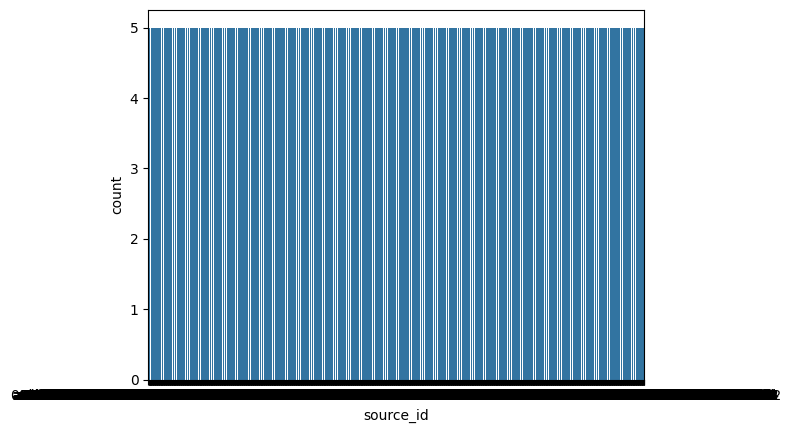

In [46]:
# sns.barplot(df_final[df_final.source_id.isin(freq.index)].source_id.value_counts())
sns.barplot(result.source_id.value_counts())

In [47]:
result.to_parquet("crowd_train_eda_all_5.pqt", index=False)

In [32]:
df_40_120 = df_final[df_final.source_id.isin(freq.index)]

In [33]:
df_40_120.to_parquet("crowd_train_eda_class_balance_40_120.pqt", index=False)